# Introduction
Titanic is one of the most notorious shipwrecks in history. In 1912, during her maiden voyage, it collided with an iceberg and sank. 1512 out of 2224 passengers and crew died in the accident.

<font color = 'blue'>
Content:

1. [Load and Check Data](#1)
1. [Variable Descriptions](#2)
    * [Univariate Variable Analysis](#3)
      * [Categorical Variable](#4)
      * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualisation](#11)
    * [Correlation between SibSp - Parch - Age - Fare - Survived](#12)
    * [SibSp - Survived](#13)
    * [Parch - Survived](#14)
    * [Pclass - Survived](#15)
    * [Age - Survived](#16)
    * [Pclass - Age - Survived](#17)
    * [Embarked - Sex - Pclass - Survived](#18)
    * [Embarked - Sex - Fare - Survived](#19)
    * [Fill Missing: Age Feature](#20)
1. [Feature Engineering](#21)
    * [Fare](#38)
    * [Age](#35)
    * [Name - Title](#22)
    * [Family Size](#23)
    * [SibSp](#36)
    * [Parch](#37)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop PassengerId and Cabin](#28)
1. [Modeling](#29)
    * [Train-Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning - Grid Search - Cross Validation](#32)
    * [Ensemble Modelling](#33)
    * [Prediction and Submission](#34)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id='1'></a>
# Load and Check Data

In [2]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
test_PassengerId=test_df['PassengerId']

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<a id='2'></a>
# Variable Descriptions

1. PassengerId: unique id number to each passenger
1. Survived: survived(1) or dead(0)
1. Pclass: passenger class
1. Name: name of passenger
1. Sex: gender of passenger
1. Age: age of passenger
1. SibSp: number of siblings and spouse
1. Parch: number of parents and children
1. Ticket: ticket number
1. Fare: amount of money spent on ticket
1. Cabin: cabin category
1. Embarked: port where passenger embarked (C:Cherbourg, Q:Queenstown, S:Southampton)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare, Age
* int64(5): PassengerId, Survived, Pclass, Sibsp, Parch
* object(5): Name, Sex, Ticket, Cabin, Embarked

<a id='3'></a>
# Univariate Variable Analysis
* Categorical Variables: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, SibSp, Parch
* Numerical Variables: Fare, Age, PassengerId

<a id='4'></a>
## Categorical Variable

In [8]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
def bar_plot(variable):
    """
    input: variable
    output: bar plot and frequency
    """
    # get variable
    var=train_df[variable]
    
    # get frequencies
    varValues=var.value_counts()    
    
    # visualisation
    plt.figure(figsize=(7,4))
    plt.bar(varValues.index, varValues)
    plt.xticks(varValues.index, varValues.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print('{}:\n {}'.format(variable,varValues))

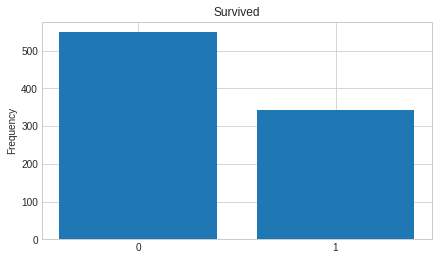

Survived:
 0    549
1    342
Name: Survived, dtype: int64


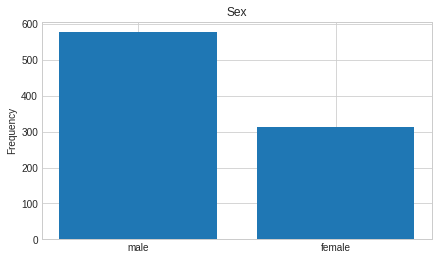

Sex:
 male      577
female    314
Name: Sex, dtype: int64


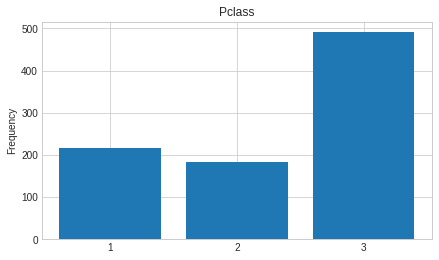

Pclass:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


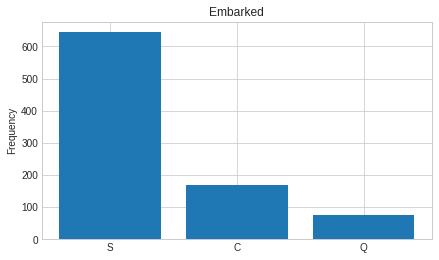

Embarked:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


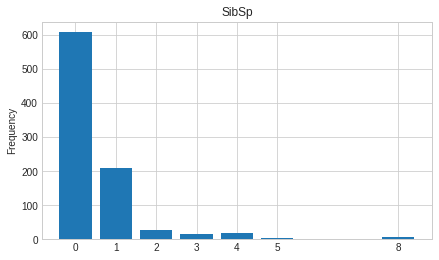

SibSp:
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


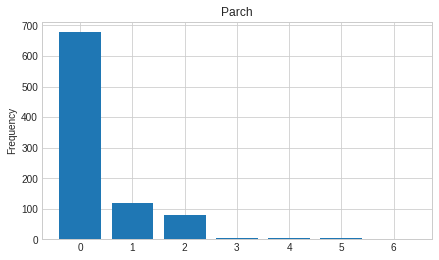

Parch:
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [10]:
category1 = ['Survived', 'Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
for c in category1:
    bar_plot(c)

In [11]:
category2 = ['Ticket', 'Name', 'Cabin']
for c in category2:
    print('{} \n\n'.format(train_df[c].value_counts()))

CA. 2343       7
347082         7
1601           7
3101295        6
347088         6
              ..
315086         1
S.O.P. 1166    1
F.C. 12750     1
335097         1
113792         1
Name: Ticket, Length: 681, dtype: int64 


del Carlo, Mr. Sebastiano                              1
Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)    1
Slabenoff, Mr. Petco                                   1
Nasser, Mrs. Nicholas (Adele Achem)                    1
Bowerman, Miss. Elsie Edith                            1
                                                      ..
Barbara, Miss. Saiide                                  1
Baumann, Mr. John D                                    1
Mernagh, Mr. Robert                                    1
Sunderland, Mr. Victor Francis                         1
Anderson, Mr. Harry                                    1
Name: Name, Length: 891, dtype: int64 


C23 C25 C27    4
G6             4
B96 B98        4
E101           3
D              3
              ..


<a id='5'></a>
## Numerical Variable

In [12]:
def hist_plot(c):
    plt.hist(train_df[c], bins=30)
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.title('{} distribution with histogram'.format(c))
    plt.show()

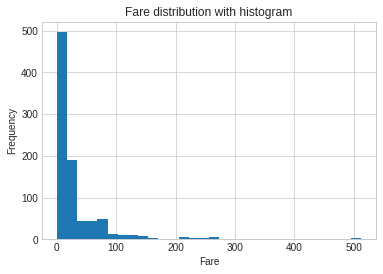

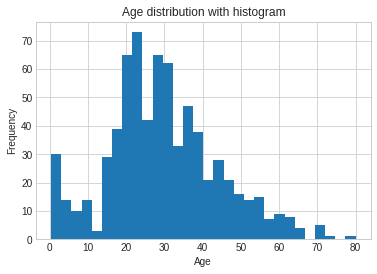

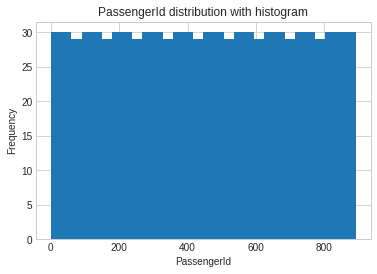

In [13]:
numerical = ['Fare', 'Age', 'PassengerId']
for c in numerical:
    hist_plot(c)

<a id='6'></a>
# Basic Data Analysis

* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [14]:
train_df[['Pclass','Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train_df[['Sex','Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
train_df[['SibSp','Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_df[['Parch','Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id='7'></a>
# Outlier Detection

In [18]:
def detect_outliers(df,columns):
    outlier_list=[]
    
    for c in columns:
        # 1st Quartile
        Q1 = np.percentile(df[c],25)
        
        # 3rd Quartile
        Q3 = np.percentile(df[c],75)
        
        # IQR
        IQR = Q3-Q1
        
        # outlier_step
        outlier_step = 1.5*IQR
        
        # detect outlier indices
        indices = df[(df[c] < Q1-outlier_step) | (df[c] > Q3+outlier_step)].index
        
        # add outlier indices to the outlier list
        outlier_list.extend(indices)
    
    outlier_list_counter=Counter(outlier_list)
    final_outlier_list = [i for i,v in outlier_list_counter.items() if v>2]
    
    return final_outlier_list

In [19]:
# detect outliers
final_outlier_list = detect_outliers(train_df, ['Age', 'Fare', 'SibSp', 'Parch'])

# show outliers
train_df.loc[final_outlier_list]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [20]:
# remove outliers
train_df = train_df.drop(final_outlier_list, axis=0).reset_index(drop=True)

<a id='8'></a>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [21]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df], axis=0).reset_index(drop=True)

<a id='9'></a>
# Find Missing Value

In [22]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [23]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id='10'></a>
# Fill Missing Value

## Embarked

In [24]:
train_df[train_df['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [25]:
train_df['Embarked'][train_df['Pclass']==1].value_counts()

S    174
C    141
Q      3
Name: Embarked, dtype: int64

There is not much difference between the number of passengers who embarked from S and embarked from C. Let's check Fare, both passengers paid 80 for Fare, maybe this can help us.

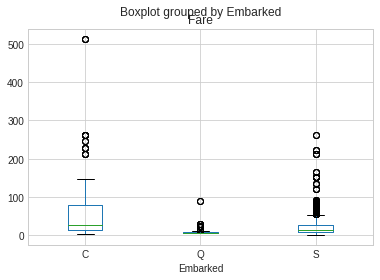

In [26]:
train_df.boxplot(column='Fare', by='Embarked')
plt.show()

In [27]:
train_df['Embarked'] = train_df['Embarked'].fillna('C')

In [28]:
train_df[train_df['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Fare

In [29]:
train_df[train_df['Fare'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [30]:
train_df['Fare'][train_df.Pclass==3].mean()

12.741219971469327

In [31]:
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'][train_df.Pclass==3].mean())

In [32]:
train_df[train_df['Fare'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id='11'></a>
# Visualisation

<a id='12'></a>
## [Correlation between SibSp - Parch - Age - Fare - Survived]

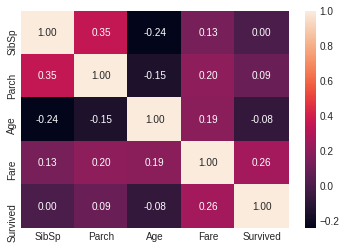

In [33]:
list1 = ['SibSp', 'Parch', 'Age', 'Fare', 'Survived']
sns.heatmap(train_df[list1].corr(), annot=True, fmt='0.2f')
plt.show()

There is significant correlation between Fare and Survived (0.26).

<a id='13'></a>
## SibSp - Survived

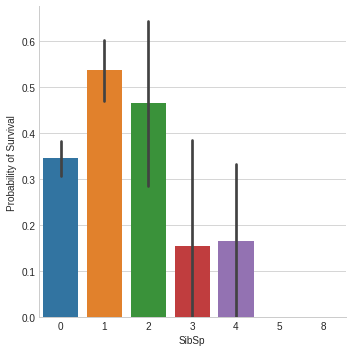

In [34]:
g = sns.factorplot(x='SibSp', y='Survived', data=train_df, kind='bar')
g.set_ylabels('Probability of Survival')
plt.show()

* Survival chance is decreasing as SibSp increases.
* Passengers with a SibSp of 0, 1 or 2 are more likely to survive.
* We can extract a new feature based on SibSp. We can form 2 groups, ones having a SibSp of 2 or less, and ones having a SibSp of 3 or more.

<a id='14'></a>
## Parch - Survived

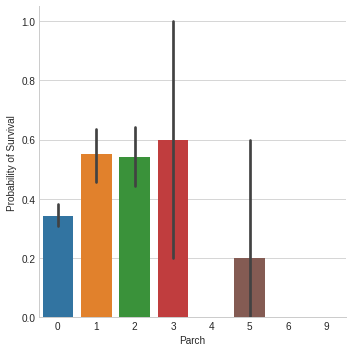

In [35]:
g = sns.factorplot(x='Parch', y='Survived', data=train_df, kind='bar')
g.set_ylabels('Probability of Survival')
plt.show()

* Passengers with a Parch of 3 or less (small families) have more chance to survive.
* We can combine Parch and SibSp wtih th=3 to extract a new feature.
* Survival probablity of Parch=3 has a significant standard deviation.

<a id='15'></a>
## Pclass - Survived

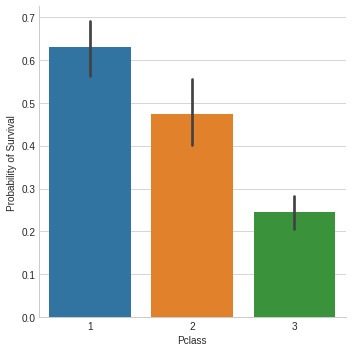

In [36]:
g = sns.factorplot(x='Pclass', y='Survived', data=train_df, kind='bar')
g.set_ylabels('Probability of Survival')
plt.show()

As you may have guessed, passengers with higher classes have more chance to survive.

<a id='16'></a>
## Age - Survived

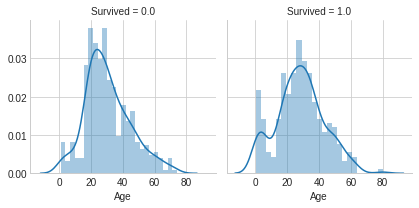

In [37]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(sns.distplot, 'Age', bins=25)
plt.show()

* Children <=10 have a high survival rate.
* Oldest people also seems mostly survived.
* People in their 20s are mostly dead.
* Most of the passengers are between 15 and 35.
* Use Age feature in training.
* Use Age distribution to fill missing values of Age.

<a id='17'></a>
## Pclass - Age - Survived

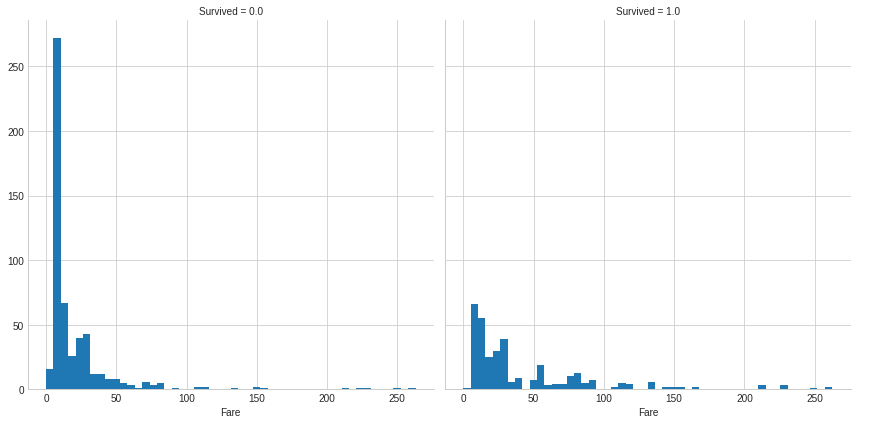

In [38]:
g = sns.FacetGrid(train_df[train_df.Fare<=300], col='Survived', size=6)
g.map(plt.hist, 'Fare', bins=50)
g.add_legend()
plt.show()

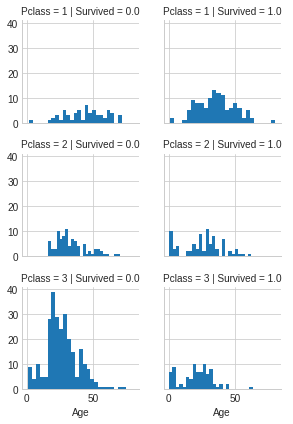

In [39]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2)
g.map(plt.hist, 'Age', bins=25)
g.add_legend()
plt.show()

* Most of the passengers are Pclass 3. And most of the Pclass 3 passengers are dead.
* Survival rate increases as the Pclass increases.
* Pclass is an important feature for our model.

<a id='18'></a>
## Embarked - Sex - Pclass - Survived

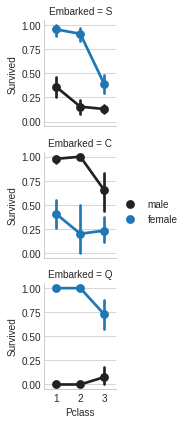

In [40]:
g = sns.FacetGrid(train_df, row='Embarked', size=2)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
g.add_legend()
plt.show()

* Females have more chance to survive.
* Males in Pclass 3 embarked in C have more chance to survive.
* Embarked and Sex will be used in training our model.

<a id='19'></a>
## Embarked - Sex - Fare - Survived

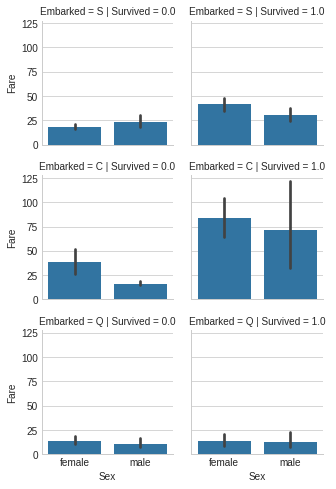

In [41]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.3)
g.map(sns.barplot, 'Sex', 'Fare' )
g.add_legend()
plt.show()

* Passengers who had paid more have more chance to survive.
* Fare feature can be turned into categorical by determining thresholds.
* People embarked in Q have more chance to survive.

## Fare - Survived

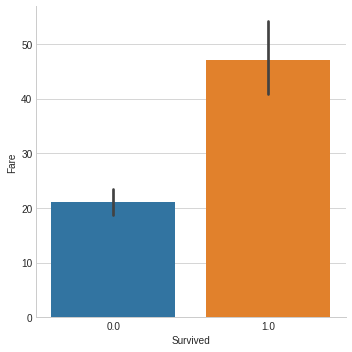

In [42]:
g = sns.factorplot(x='Survived', y='Fare', data=train_df, kind='bar')
plt.show()

<a id='20'></a>
## Fill Missing: Age Feature

In [43]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


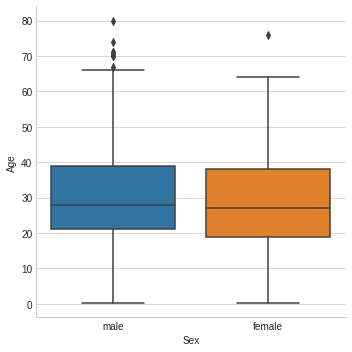

In [44]:
sns.factorplot(x='Sex', y='Age', data=train_df, kind='box')
plt.show()

Age distribution seems very similar for males and females. Sex is not informative for age prediction.

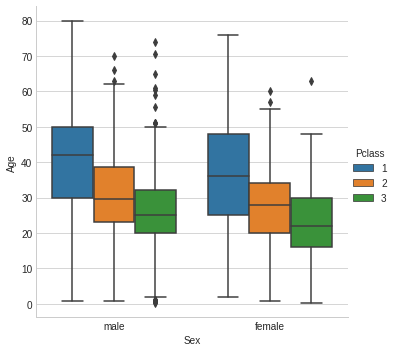

In [45]:
sns.factorplot(x='Sex', y='Age', hue='Pclass', data=train_df, kind='box')
plt.show()

* Pclass 1 passengers approximately have a median of 40.
* Pclass 2 passengers approximately have a median of 30.
* Pclass 3 passengers approximately have a median of 24.

Pclass can be used for age prediction.

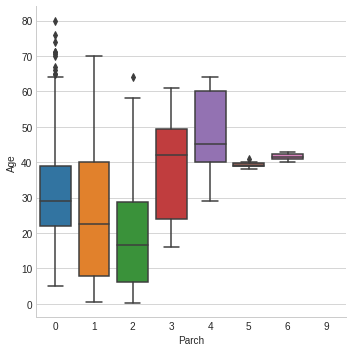

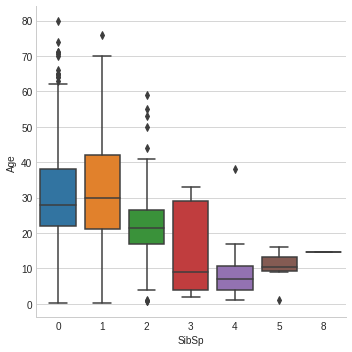

In [46]:
sns.factorplot(x='Parch', y='Age', data=train_df, kind='box')
sns.factorplot(x='SibSp', y='Age', data=train_df, kind='box')
plt.show()

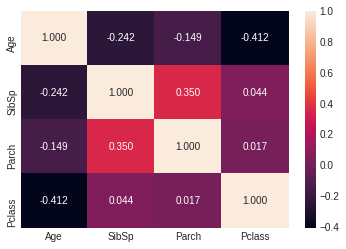

In [47]:
sns.heatmap(train_df[['Age','Sex','SibSp','Parch','Pclass']].corr(), annot=True, fmt='0.3f')
plt.show()

We cannot see Sex feature on the heatmap, since it has string values. It has to be consisted of numeric values, to be included in the heatmap.

In [48]:
train_df['Sex']=list(1 if i=='male' else 0 for i in train_df['Sex'])

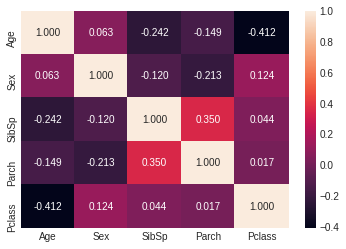

In [49]:
sns.heatmap(train_df[['Age','Sex','SibSp','Parch','Pclass']].corr(), annot=True, fmt='0.3f')
plt.show()

* There is no correlation between Age and Sex, as we have noticed before.
* There is some correlation between Age and SibSp, Parch, Pclass.

In [50]:
train_df['Sex']=list('male' if i==1 else 'female' for i in train_df['Sex'])

In [51]:
index_nan_age = list(train_df[train_df['Age'].isnull()].index)

In [52]:
for i in index_nan_age:
    age_prediction = train_df['Age'][((train_df['SibSp']==train_df.iloc[i]['SibSp']) & (train_df['Parch']==train_df.iloc[i]['Parch']) & (train_df['Pclass']==train_df.iloc[i]['Pclass']))].median()
    age_med = train_df['Age'].median()
    if not np.isnan(age_prediction):
        train_df['Age'].iloc[i] = age_prediction
    else:
        train_df['Age'].iloc[i] = age_med

In [53]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id='21'></a>
# Feature Engineering

<a id='38'></a>
## Fare

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
fare = np.array(train_df.Fare[:train_df_len]).reshape(-1,1)
survived = np.array(train_df.Survived[:train_df_len]).reshape(-1,1)
DecTree = DecisionTreeRegressor(max_leaf_nodes=150)
DecTree.fit(fare, survived)
train_df['Fare_class'] = DecTree.apply(np.array(train_df.Fare).reshape(-1,1))

In [56]:
train_df = pd.get_dummies(data=train_df, columns=['Fare_class'])

In [57]:
train_df.drop('Fare', axis=1, inplace=True)

<a id='35'></a>
## Age

In [58]:
train_df['Age'] = train_df['Age'].astype('int')

In [59]:
train_df['Age_based_survival'] = 0

In [60]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,...,Fare_class_289,Fare_class_290,Fare_class_291,Fare_class_292,Fare_class_293,Fare_class_295,Fare_class_296,Fare_class_297,Fare_class_298,Age_based_survival
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,C85,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,C123,...,0,0,0,0,0,0,0,0,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,NaN,...,0,0,0,0,0,0,0,1,0,0


In [61]:
for i in range(train_df['Age'].max()+1):
    df = train_df[train_df['Age']==i][train_df.Survived.isna() == False]
    avg_surv_prob = df['Survived'].mean()
    train_df.loc[train_df.Age==i,'Age_based_survival'] = avg_surv_prob

In [62]:
train_df['Age_based_survival'] = train_df['Age_based_survival'].fillna(0)
train_df[train_df['Age_based_survival'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,...,Fare_class_289,Fare_class_290,Fare_class_291,Fare_class_292,Fare_class_293,Fare_class_295,Fare_class_296,Fare_class_297,Fare_class_298,Age_based_survival


In [63]:
train_df.drop('Age', axis=1, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,...,Fare_class_289,Fare_class_290,Fare_class_291,Fare_class_292,Fare_class_293,Fare_class_295,Fare_class_296,Fare_class_297,Fare_class_298,Age_based_survival
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,NaN,S,...,0,0,0,0,0,0,0,0,0,0.407407
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C,...,0,0,0,0,0,0,0,0,0,0.647059
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,NaN,S,...,0,0,0,0,0,0,0,0,0,0.333333
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S,...,0,0,0,0,0,0,0,0,0,0.611111
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,NaN,S,...,0,0,0,0,0,0,0,1,0,0.611111


<a id='22'></a>
## Name - Title

In [64]:
train_df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [65]:
"Braund, Mr. Owen Harris".split('.')[0].split(',')[-1].strip()

'Mr'

In [66]:
train_df['Title'] = [i.split('.')[0].split(',')[-1].strip() for i in train_df['Name']]
train_df['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1294        Mr
1295      Dona
1296        Mr
1297        Mr
1298    Master
Name: Title, Length: 1299, dtype: object

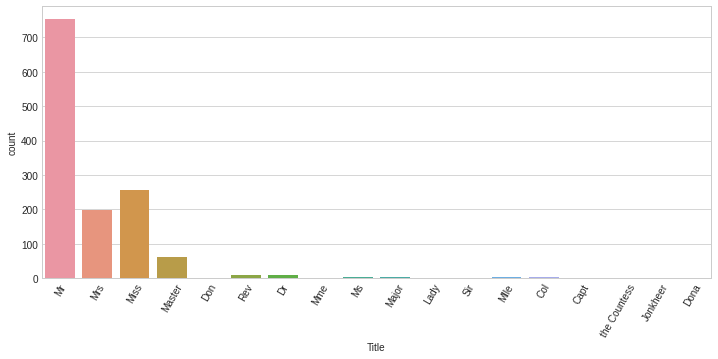

In [67]:
plt.figure(figsize=(12,5))
sns.countplot(train_df['Title'])
plt.xticks(rotation=60)
plt.show()

In [68]:
train_df['Title'] = train_df['Title'].replace(['Lady','the Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'other')

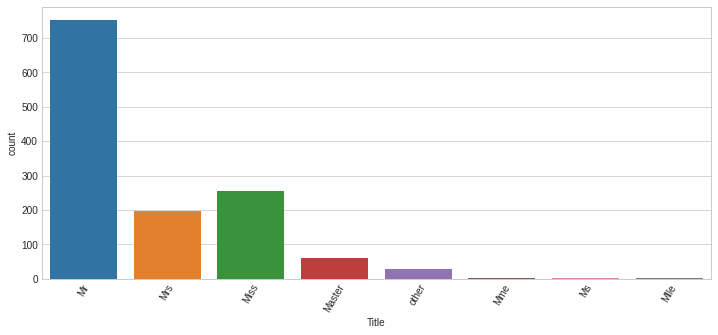

In [69]:
plt.figure(figsize=(12,5))
sns.countplot(train_df['Title'])
plt.xticks(rotation=60)
plt.show()

In [70]:
train_df['Title'] = [0 if i=='Master' else 1 if i=='Miss' or i=='Ms' or i=='Mlle' or i=='Mrs' else 2 if i=='Mr' else 3 for i in train_df['Title']]

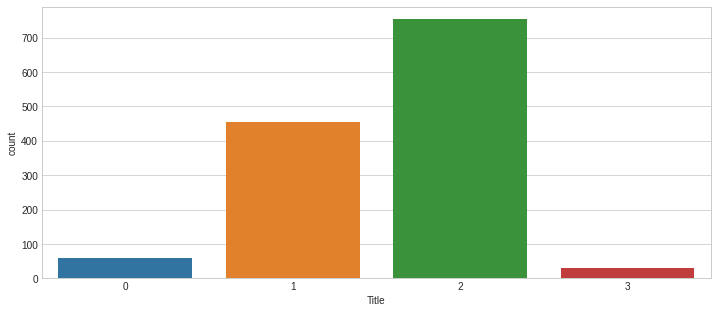

In [71]:
plt.figure(figsize=(12,5))
sns.countplot(train_df['Title'])
plt.show()

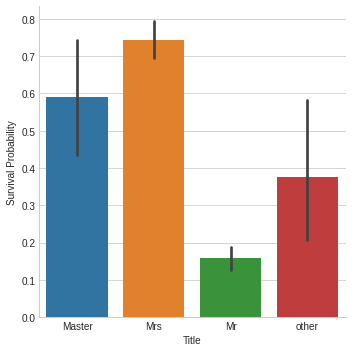

In [72]:
g = sns.factorplot(x='Title', y='Survived', data=train_df, kind='bar')
g.set_xticklabels(['Master','Mrs','Mr','other'])
g.set_ylabels('Survival Probability')
plt.show()

In [73]:
train_df.drop('Name', axis=1, inplace=True)

In [74]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Fare_class_10,...,Fare_class_290,Fare_class_291,Fare_class_292,Fare_class_293,Fare_class_295,Fare_class_296,Fare_class_297,Fare_class_298,Age_based_survival,Title
0,1,0.0,3,male,1,0,A/5 21171,NaN,S,0,...,0,0,0,0,0,0,0,0,0.407407,2
1,2,1.0,1,female,1,0,PC 17599,C85,C,0,...,0,0,0,0,0,0,0,0,0.647059,1
2,3,1.0,3,female,0,0,STON/O2. 3101282,NaN,S,0,...,0,0,0,0,0,0,0,0,0.333333,1
3,4,1.0,1,female,1,0,113803,C123,S,0,...,0,0,0,0,0,0,0,0,0.611111,1
4,5,0.0,3,male,0,0,373450,NaN,S,0,...,0,0,0,0,0,0,1,0,0.611111,2


In [75]:
train_df = pd.get_dummies(data=train_df, columns=['Title'])

In [76]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Fare_class_10,...,Fare_class_293,Fare_class_295,Fare_class_296,Fare_class_297,Fare_class_298,Age_based_survival,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,1,0,A/5 21171,NaN,S,0,...,0,0,0,0,0,0.407407,0,0,1,0
1,2,1.0,1,female,1,0,PC 17599,C85,C,0,...,0,0,0,0,0,0.647059,0,1,0,0
2,3,1.0,3,female,0,0,STON/O2. 3101282,NaN,S,0,...,0,0,0,0,0,0.333333,0,1,0,0
3,4,1.0,1,female,1,0,113803,C123,S,0,...,0,0,0,0,0,0.611111,0,1,0,0
4,5,0.0,3,male,0,0,373450,NaN,S,0,...,0,0,0,1,0,0.611111,0,0,1,0


<a id='23'></a>
## Family Size

In [77]:
train_df['Fsize'] = train_df['SibSp'] + train_df['Parch'] + 1

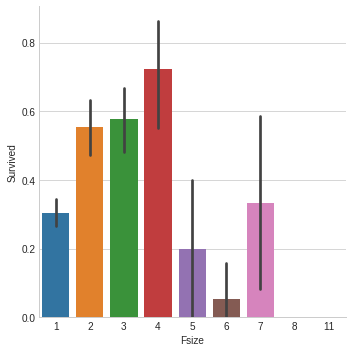

In [78]:
g = sns.factorplot(x='Fsize', y='Survived', data=train_df, kind='bar')
plt.show()

In [79]:
train_df['Family_size'] = [1 if i in [2,3,4] else 0 for i in train_df['Fsize']]

In [80]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Fare_class_10,...,Fare_class_296,Fare_class_297,Fare_class_298,Age_based_survival,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size
0,1,0.0,3,male,1,0,A/5 21171,NaN,S,0,...,0,0,0,0.407407,0,0,1,0,2,1
1,2,1.0,1,female,1,0,PC 17599,C85,C,0,...,0,0,0,0.647059,0,1,0,0,2,1
2,3,1.0,3,female,0,0,STON/O2. 3101282,NaN,S,0,...,0,0,0,0.333333,0,1,0,0,1,0
3,4,1.0,1,female,1,0,113803,C123,S,0,...,0,0,0,0.611111,0,1,0,0,2,1
4,5,0.0,3,male,0,0,373450,NaN,S,0,...,0,1,0,0.611111,0,0,1,0,1,0


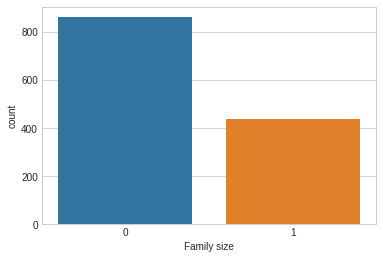

In [81]:
sns.countplot(x='Family_size', data=train_df)
plt.xlabel('Family size')
plt.show()

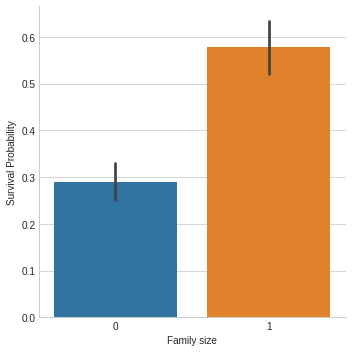

In [82]:
g = sns.factorplot(x='Family_size', y='Survived', data=train_df, kind='bar')
g.set_xlabels('Family size')
g.set_ylabels('Survival Probability')
plt.show()

Small families have more survival chance than large families.

In [83]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Fare_class_10,...,Fare_class_296,Fare_class_297,Fare_class_298,Age_based_survival,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size
0,1,0.0,3,male,1,0,A/5 21171,NaN,S,0,...,0,0,0,0.407407,0,0,1,0,2,1
1,2,1.0,1,female,1,0,PC 17599,C85,C,0,...,0,0,0,0.647059,0,1,0,0,2,1
2,3,1.0,3,female,0,0,STON/O2. 3101282,NaN,S,0,...,0,0,0,0.333333,0,1,0,0,1,0
3,4,1.0,1,female,1,0,113803,C123,S,0,...,0,0,0,0.611111,0,1,0,0,2,1
4,5,0.0,3,male,0,0,373450,NaN,S,0,...,0,1,0,0.611111,0,0,1,0,1,0


<a id='36'></a>
## SibSp

In [84]:
train_df['SibSp_categ'] = [0 if i in [0,1,2] else 1 if i in [3,4] else 2 for i in train_df.SibSp]

In [85]:
train_df = pd.get_dummies(data=train_df, columns=['SibSp_categ'])

<a id='37'></a>
## Parch

In [86]:
train_df['Parch_categ'] = [0 if i in [1,2,3] else 1 if i in [0,5] else 2 for i in train_df.Parch]

In [87]:
train_df = pd.get_dummies(data=train_df, columns=['Parch_categ'])

In [88]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Fare_class_10,...,Title_2,Title_3,Fsize,Family_size,SibSp_categ_0,SibSp_categ_1,SibSp_categ_2,Parch_categ_0,Parch_categ_1,Parch_categ_2
0,1,0.0,3,male,1,0,A/5 21171,NaN,S,0,...,1,0,2,1,1,0,0,0,1,0
1,2,1.0,1,female,1,0,PC 17599,C85,C,0,...,0,0,2,1,1,0,0,0,1,0
2,3,1.0,3,female,0,0,STON/O2. 3101282,NaN,S,0,...,0,0,1,0,1,0,0,0,1,0
3,4,1.0,1,female,1,0,113803,C123,S,0,...,0,0,2,1,1,0,0,0,1,0
4,5,0.0,3,male,0,0,373450,NaN,S,0,...,1,0,1,0,1,0,0,0,1,0


<a id='24'></a>
## Embarked

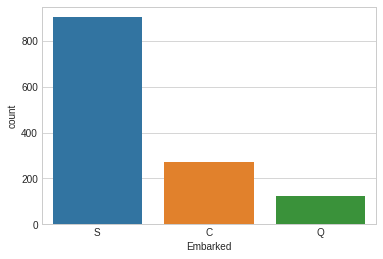

In [89]:
sns.countplot(train_df['Embarked'])
plt.show()

In [90]:
train_df = pd.get_dummies(data=train_df, columns=['Embarked'])

In [91]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Fare_class_10,Fare_class_11,...,Family_size,SibSp_categ_0,SibSp_categ_1,SibSp_categ_2,Parch_categ_0,Parch_categ_1,Parch_categ_2,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,1,0,A/5 21171,NaN,0,0,...,1,1,0,0,0,1,0,0,0,1
1,2,1.0,1,female,1,0,PC 17599,C85,0,0,...,1,1,0,0,0,1,0,1,0,0
2,3,1.0,3,female,0,0,STON/O2. 3101282,NaN,0,0,...,0,1,0,0,0,1,0,0,0,1
3,4,1.0,1,female,1,0,113803,C123,0,0,...,1,1,0,0,0,1,0,0,0,1
4,5,0.0,3,male,0,0,373450,NaN,0,0,...,0,1,0,0,0,1,0,0,0,1


<a id='25'></a>
## Ticket

In [92]:
train_df['Ticket'].head(50)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27              330959
28              349216
29            PC 17601
30            PC 17569
31              335677
32          C.A. 24579
33            PC 17604
34              113789
35                2677
36          A./5. 2152
37              345764
38                2651
39                7546
40               11668
41              349253
42       SC/Paris 2123
43         

In [93]:
ticket_list=[]
for i in train_df['Ticket']:
    if not i.strip().isdigit():
        ticket_list.append(i.strip().replace('.','').replace('/','').split()[0])
    else:
        ticket_list.append('x')
train_df['Ticket'] = ticket_list

In [94]:
train_df['Ticket']

0            A5
1            PC
2        STONO2
3             x
4             x
         ...   
1294         A5
1295         PC
1296    SOTONOQ
1297          x
1298          x
Name: Ticket, Length: 1299, dtype: object

In [95]:
train_df = pd.get_dummies(train_df, columns=['Ticket'], prefix='T')

In [96]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin,Fare_class_10,Fare_class_11,Fare_class_22,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,1,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,female,1,0,C85,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,female,0,0,NaN,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,female,1,0,C123,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,male,0,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<a id='26'></a>
## Pclass

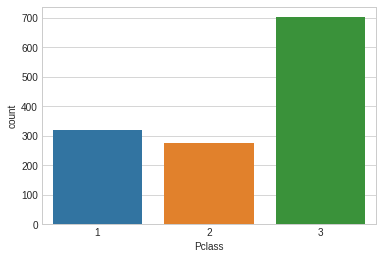

In [97]:
sns.countplot(x=train_df['Pclass'])
plt.show()

In [98]:
train_df['Pclass'] = train_df['Pclass'].astype('category')
train_df = pd.get_dummies(data=train_df, columns=['Pclass'])
train_df.head()

,PassengerId,Survived,Sex,SibSp,Parch,Cabin,Fare_class_10,Fare_class_11,Fare_class_22,Fare_class_30,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,male,1,0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,female,1,0,C85,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,female,0,0,NaN,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,female,1,0,C123,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,male,0,0,NaN,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id='27'></a>
## Sex

In [99]:
train_df['Sex'] = train_df['Sex'].astype('category')
train_df = pd.get_dummies(data=train_df, columns=['Sex'])
train_df.head()

,PassengerId,Survived,SibSp,Parch,Cabin,Fare_class_10,Fare_class_11,Fare_class_22,Fare_class_30,Fare_class_33,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,1,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,1,0,C85,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,0,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,1,0,C123,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,0,0,NaN,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


> <a id='28'></a>
## Drop PassengerId and Cabin

In [100]:
train_df.drop(labels=['PassengerId', 'Cabin'], axis=1, inplace=True)
train_df.columns

Index(['Survived', 'SibSp', 'Parch', 'Fare_class_10', 'Fare_class_11',
       'Fare_class_22', 'Fare_class_30', 'Fare_class_33', 'Fare_class_35',
       'Fare_class_41',
       ...
       'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object', length=211)

> <a id='29'></a>
# Modeling

<a id='30'></a>
## Train-Test Split

In [101]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [102]:
train_df_len

881

In [103]:
train_df.head()

,Survived,SibSp,Parch,Fare_class_10,Fare_class_11,Fare_class_22,Fare_class_30,Fare_class_33,Fare_class_35,Fare_class_41,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [104]:
train_df = (train_df - train_df.min())/(train_df.max() - train_df.min())

In [105]:
train_df.columns.values

array(['Survived', 'SibSp', 'Parch', 'Fare_class_10', 'Fare_class_11',
       'Fare_class_22', 'Fare_class_30', 'Fare_class_33', 'Fare_class_35',
       'Fare_class_41', 'Fare_class_42', 'Fare_class_43', 'Fare_class_48',
       'Fare_class_60', 'Fare_class_63', 'Fare_class_64', 'Fare_class_67',
       'Fare_class_69', 'Fare_class_72', 'Fare_class_80', 'Fare_class_85',
       'Fare_class_87', 'Fare_class_92', 'Fare_class_93', 'Fare_class_95',
       'Fare_class_97', 'Fare_class_99', 'Fare_class_101',
       'Fare_class_102', 'Fare_class_105', 'Fare_class_108',
       'Fare_class_109', 'Fare_class_111', 'Fare_class_112',
       'Fare_class_113', 'Fare_class_114', 'Fare_class_118',
       'Fare_class_120', 'Fare_class_121', 'Fare_class_125',
       'Fare_class_126', 'Fare_class_127', 'Fare_class_129',
       'Fare_class_132', 'Fare_class_135', 'Fare_class_136',
       'Fare_class_139', 'Fare_class_140', 'Fare_class_141',
       'Fare_class_142', 'Fare_class_144', 'Fare_class_145',
       

In [106]:
test = train_df[train_df_len:]
test.drop(labels=['Survived'], axis=1, inplace=True)
test.head()

,SibSp,Parch,Fare_class_10,Fare_class_11,Fare_class_22,Fare_class_30,Fare_class_33,Fare_class_35,Fare_class_41,Fare_class_42,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
881,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
882,0.125,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
883,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
884,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
885,0.125,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [107]:
train_df

,Survived,SibSp,Parch,Fare_class_10,Fare_class_11,Fare_class_22,Fare_class_30,Fare_class_33,Fare_class_35,Fare_class_41,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,0.125,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.125,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.125,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,NaN,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1295,NaN,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1296,NaN,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1297,NaN,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [108]:
train = train_df[:train_df_len]
y_train = train['Survived']
x_train = train.drop('Survived', axis=1)
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=42)
print('x_train: ',len(x_train))
print('x_test: ',len(x_test))
print('y_train: ',len(y_train))
print('y_test: ',len(y_test))
print('test: ',len(test))

x_train:  704
x_test:  177
y_train:  704
y_test:  177
test:  418


<a id='31'></a>
## Simple Logistic Regression

In [109]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
acc_logreg_train = round(log_reg.score(x_train,y_train)*100,2)
acc_logreg_test = round(log_reg.score(x_test,y_test)*100,2)
print('Training accuracy: %{}'.format(acc_logreg_train))
print('Testing accuracy: %{}'.format(acc_logreg_test))

Training accuracy: %88.21
Testing accuracy: %85.88


<a id='32'></a>
## Hyperparameter Tuning - Grid Search - Cross Validation
We will compare 5 ML classifiers and evaluate mean accuracy for each of them by stratified cross validation.

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [110]:
random_state = 42

model_list = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state, probability=True),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

grid_list = [dt_param_grid, svc_param_grid, rf_param_grid, logreg_param_grid, knn_param_grid]

In [111]:
score_list = []
best_estimators = []

for i in range(5):
    my_model = GridSearchCV(estimator=model_list[i], param_grid=grid_list[i], scoring='accuracy', n_jobs=-1, cv=StratifiedKFold(n_splits=10))
    my_model.fit(x_train, y_train)
    score_list.append(accuracy_score(my_model.best_estimator_.predict(x_test), y_test))
    best_estimators.append(my_model.best_estimator_)

print('Best scores: ', score_list, '\n')

Best scores:  [0.8587570621468926, 0.8587570621468926, 0.847457627118644, 0.8700564971751412, 0.807909604519774] 



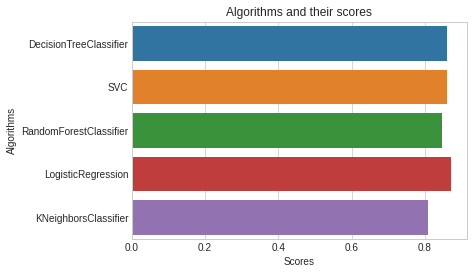

[0.8587570621468926, 0.8587570621468926, 0.847457627118644, 0.8700564971751412, 0.807909604519774]


In [112]:
cv_results = pd.DataFrame({'Algorithms': ['DecisionTreeClassifier',
             'SVC',
             'RandomForestClassifier',
             'LogisticRegression',
             'KNeighborsClassifier'], 'Scores':score_list})

sns.barplot(y='Algorithms', x='Scores', data=cv_results)
plt.title('Algorithms and their scores')
plt.show()
print(score_list)

<a id='33'></a>
## Ensemble Modelling

In [113]:
votingC = VotingClassifier([('RandomForest',best_estimators[2]),
                           ('SVC',best_estimators[1]),
                           ('Logistic',best_estimators[3])], voting='soft', n_jobs=-1)
votingC.fit(x_train, y_train)
print('Ensembled score: ', accuracy_score(votingC.predict(x_test),y_test))

Ensembled score:  0.8813559322033898


<a id='34'></a>
## Prediction and Submission

In [114]:
test_survived = pd.Series(votingC.predict(test), name='Survived').astype(int)
results = pd.concat([test_PassengerId, test_survived], axis=1)
results.to_csv('titanic.csv', index=False)